In [ ]:
import numpy as np
import os
import pandas as pd

from bestiapop import bestiapop

## Storing climate data in a pandas dataframe

In this example we will download data to a pandas dataframe

### Define your climate extraction variables

We need to define the scope of what type of data and output we expect from BestiaPop.

In [ ]:
# Define variables to pass in to ClimateBeast
action='generate-climate-file'
data_source='silo'
year_range='2015-2016'
climate_variables=['radiation', 'max_temp', 'min_temp', 'daily_rain']
lat_range=[-41.15, -41.05]
lon_range=[145.5, 145.6]
output_type='dataframe' # <-- selecting pandas dataframe as output of our data processing
output_path=None # <-- no dir since we are not dumping data to a file

## Instantiate and run BestiaPop

In [ ]:
climate_data = bestiapop.CLIMATEBEAST(
    action=action,
    data_source=data_source,
    output_path=output_path,
    output_type=output_type,
    input_path=None,
    climate_variables=climate_variables,
    year_range=year_range,
    lat_range=lat_range,
    lon_range=lon_range,
    multiprocessing=None
    )

In [ ]:
data = climate_data.process_records(action)

In [ ]:
# let's show the dataframe
data

## Storing climate data in met files

In this example we will download data to met files

### Define your climate extraction variables

We need to define the scope of what type of data and output we expect from BestiaPop.

In [ ]:
# Define variables to pass in to ClimateBeast
action='generate-climate-file'
data_source='silo'
year_range='2015-2016'
climate_variables=['radiation', 'max_temp', 'min_temp', 'daily_rain']
lat_range=[-41.15, -41.05]
lon_range=[145.5, 145.6]
output_type='met'
output_path=os.getcwd() # current dir

## Instantiate and run BestiaPop

In [ ]:
climate_data = bestiapop.CLIMATEBEAST(
    action='generate-climate-file',
    data_source=data_source,
    output_path=output_path,
    output_type=output_type,
    input_path=None,
    climate_variables=climate_variables,
    year_range=year_range,
    lat_range=lat_range,
    lon_range=lon_range,
    multiprocessing=None
    )

In [ ]:
climate_data.process_records(action) # no need to store the results in a variable since they are dumped to disk

## Zip the generated MET files & Download them

Let's now grab all the MET files and compress them. We need to get rid of the ocasional minus sign at the beginning of some 
MET files (depending on your lat/lon range), because `tar` does not do well with such filenames. In any case, this code should work for you.

> NOTE: make sure to change the extension of the file, depending on which format you chose for the output.

In [ ]:
%%bash
for f in *.met; do
    mv -- "$f" "bpop.${f}"
done

tar chvfz bestiapop_files.tar.gz bpop*.met

Search for your file by clicking `file --> open` in the top left menu of this JupterNotebook. You can download the compressed file and unzip in your own machine (we recommend you use `7zip` if using a Windows machine).

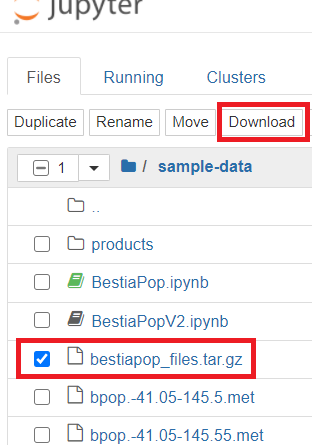

## Working with lists of lat/lon combinations

In this example we will download climate data based off a list of lat/lon datapoints

### Define your climate extraction variables

We need to define the scope of what type of data and output we expect from BestiaPop.

> **NOTE**: the `coordinate_list` variable contains lists of lat/lon pairs where the first value is `latitutde` and the second value is `longitude`

In [ ]:
# Define variables to pass in to ClimateBeast

coordinate_list = [
    [-41.15, 145.5],
    [-43.45, 146.7],
    [-41.25, 145.25],
    [-42.70, 147.45],
    [-41.50, 145.6]
]

action='generate-climate-file'
data_source='silo'
year_range='2015-2016'
climate_variables=['radiation', 'max_temp', 'min_temp', 'daily_rain']
output_type='dataframe'
output_path=None

## Instantiate and run BestiaPop

In this instance we will iterate over the lat/lon combinations

In [ ]:
final_df = pd.DataFrame()

for coord in coordinate_list:
    print('Fetching data for {}/{}'.format(coord[0], coord[1]))
    climate_data = bestiapop.CLIMATEBEAST(
        action='generate-climate-file',
        data_source=data_source,
        output_path=output_path,
        output_type=output_type,
        input_path=None,
        climate_variables=climate_variables,
        year_range=year_range,
        lat_range=[coord[0]],
        lon_range=[coord[1]],
        multiprocessing=None
        )
    data = climate_data.process_records(action)
    final_df = final_df.append(data, ignore_index=True)

# Show the final dataframe
final_df